<a href="https://colab.research.google.com/github/iceberg12/anlp/blob/main/Codelab_Multilangs_MRC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Reading Comprehension Multilingual

# Download project
Link project
https://drive.google.com/file/d/1-LiVUYg94LCZGKq1KTjFgF_3VmVU4qtp/view?usp=sharing

In [ ]:
# !wget https://bitly.com/31burcA
# !mv 31burcA mrc.zip
# !unzip mrc.zip
# !rm mrc.zip
!gdown --id 1-LiVUYg94LCZGKq1KTjFgF_3VmVU4qtp
!unzip MultiMRC-VietAI-full.zip
!rm MultiMRC-VietAI-full.zip

Downloading...
From: https://drive.google.com/uc?id=1-LiVUYg94LCZGKq1KTjFgF_3VmVU4qtp
To: /content/MultiMRC-VietAI-full.zip
1.37GB [00:14, 93.3MB/s]
Archive:  MultiMRC-VietAI-full.zip
   creating: MultiMRC-VietAI/
   creating: MultiMRC-VietAI/data-bin/
  inflating: MultiMRC-VietAI/requirements.txt  
  inflating: MultiMRC-VietAI/infer_mrc_model.py  
   creating: MultiMRC-VietAI/plugin/
  inflating: MultiMRC-VietAI/unify_data.py  
   creating: MultiMRC-VietAI/doc_imgs/
  inflating: MultiMRC-VietAI/README.md  
  inflating: MultiMRC-VietAI/prepare_mrc_data.py  
   creating: MultiMRC-VietAI/model-bin/
  inflating: MultiMRC-VietAI/train_mrc_model.py  
  inflating: MultiMRC-VietAI/data-bin/.DS_Store  
  inflating: __MACOSX/MultiMRC-VietAI/data-bin/._.DS_Store  
   creating: MultiMRC-VietAI/data-bin/preprocessed/
   creating: MultiMRC-VietAI/data-bin/raw/
   creating: MultiMRC-VietAI/plugin/tasks/
  inflating: MultiMRC-VietAI/plugin/__init__.py  
   creating: MultiMRC-VietAI/plugin/models/
   

In [ ]:
from pathlib import Path
import sys
base = Path('/content/MultiMRC-VietAI')
sys.path.append(str(base))
%cd MultiMRC-VietAI/

/content/MultiMRC-VietAI


# Prepare environment

In [ ]:
!pip install -r requirements.txt

     |████████████████████████████████| 748.8MB 23kB/s 
     |████████████████████████████████| 307kB 55.2MB/s 
     |████████████████████████████████| 1.1MB 49.5MB/s 
     |████████████████████████████████| 1.4MB 26.8MB/s 
     |████████████████████████████████| 61kB 8.8MB/s 
  Created wheel for fairseq: filename=fairseq-0.9.0-cp37-cp37m-linux_x86_64.whl size=2122195 sha256=95669752bbb9fcae4e90d31a82ffa5026b6c3cd9237c7d9106103d1f5a1d5bd3
  Stored in directory: /root/.cache/pip/wheels/37/3e/1b/0fa30695dcba41e4b0088067fa40f3328d1e8ee78c22cd4766
  Created wheel for nltk: filename=nltk-3.5-cp37-none-any.whl size=1434676 sha256=617f4b3199026813cce324a314ab4df4fcf59f6072bb5d5a042573679bce2d35
  Stored in directory: /root/.cache/pip/wheels/ae/8c/3f/b1fe0ba04555b08b57ab52ab7f86023639a526d8bc8d384306
Successfully built fairseq nltk
ERROR: torchvision 0.9.1+cu101 has requirement torch==1.8.1, but you'll have torch 1.6.0 which is incompatible.
ERROR: torchtext 0.9.1 has requirement torch==1.8.1,

# Let's go

In [ ]:
import infer_mrc_model
import nltk
import json
import sys
from fairseq.models.roberta import XLMRModel
from unify_data import write_fairseq_dataset
import prepare_mrc_data
import train_mrc_model
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## What are we going to achieve?

In [ ]:
task_rr, model_rr, is_cuda = infer_mrc_model.load_model()

Namespace(bpe=None, context_window=0, cpu=False, criterion='cross_entropy', data='./model-bin/mrc_span', dataset_impl=None, empty_cache_freq=0, force_anneal=None, fp16=False, fp16_init_scale=128, fp16_scale_tolerance=0.0, fp16_scale_window=None, gen_subset='test', lazy_load=False, left_pad_source='True', left_pad_target='False', load_alignments=False, log_format=None, log_interval=1000, lr_scheduler='fixed', lr_shrink=0.1, max_sentences=None, max_source_positions=1024, max_target_positions=1024, max_tokens=None, memory_efficient_fp16=False, min_loss_scale=0.0001, model_overrides='{}', momentum=0.99, no_progress_bar=False, num_shards=1, num_workers=1, optimizer='nag', output_word_probs=False, output_word_stats=False, path=None, pre_trained_lm='./model-bin/language_model/xlmr.base', quiet=False, raw_text=False, remove_bpe=None, required_batch_size_multiple=8, results_path=None, seed=1, shard_id=0, skip_invalid_size_inputs_valid_test=False, softmax_batch=9223372036854775807, source_lang='

In [ ]:
def do_mrc(question, context):
  result, result_indices, result_score = infer_mrc_model.infer_model([question],
                                                                     [context],
                                                                     task_rr,
                                                                     model_rr,
                                                                     is_cuda)
  for r, i, s in zip(result, result_indices, result_score):
      if len(r[0]) == 0:
          print("No Answer")
      else:
          # print("{} : {:.2f} : {}".format(i[0], s[0], r[0]))
          print("Answer: {}".format(r[0]))

In [ ]:
context_input = "Tối 24/2, Bộ Y tế công bố nước ta có 19 ca mắc mới Covid-19 tại Hải Dương (Việt Nam); gồm 6 bệnh nhân tại ổ dịch xã Kim Liên, 2 ca tại Cẩm Giàng và một trường hợp phát hiện qua sàng lọc."
context_input

'Tối 24/2, Bộ Y tế công bố nước ta có 19 ca mắc mới Covid-19 tại Hải Dương (Việt Nam); gồm 6 bệnh nhân tại ổ dịch xã Kim Liên, 2 ca tại Cẩm Giàng và một trường hợp phát hiện qua sàng lọc.'

In [ ]:
do_mrc("Tính tới 24/2, cả nước có bao nhiêu trường hợp nhiễm Covid-19?", context_input)

Answer: 19


In [ ]:
do_mrc("Các địa điểm nào được đề cập?", context_input)

Answer: Cẩm Giàng


In [ ]:
do_mrc("Cẩm Giàng nằm ở đâu?", context_input)

Answer: 2 ca


In [ ]:
do_mrc("On 24/2, how many cases of Covid-19 were there in the country?", context_input)

Answer: 19


In [ ]:
do_mrc("How many case in Kim Lien", context_input)

Answer: 6


In [ ]:
do_mrc("How many ca mắc in Cam Giang", context_input)

Answer: 19


In [ ]:
do_mrc("Hải Dương nằm ở đâu", context_input)

Answer: Việt Nam


# What do we have?

## Dataset

In [ ]:
with open('./data-bin/raw/train-v2.0.json', 'r', encoding='utf-8') as file:
  squad_train = json.load(file)
with open('./data-bin/raw/dev-v2.0.json', 'r', encoding='utf-8') as file:
  squad_valid = json.load(file)

In [ ]:
print(json.dumps(squad_train['data'][0]['paragraphs'][0], indent=4, ensure_ascii=False))

{
    "qas": [
        {
            "question": "When did Beyonce start becoming popular?",
            "id": "56be85543aeaaa14008c9063",
            "answers": [
                {
                    "text": "in the late 1990s",
                    "answer_start": 269
                }
            ],
            "is_impossible": false
        },
        {
            "question": "What areas did Beyonce compete in when she was growing up?",
            "id": "56be85543aeaaa14008c9065",
            "answers": [
                {
                    "text": "singing and dancing",
                    "answer_start": 207
                }
            ],
            "is_impossible": false
        },
        {
            "question": "When did Beyonce leave Destiny's Child and become a solo singer?",
            "id": "56be85543aeaaa14008c9066",
            "answers": [
                {
                    "text": "2003",
                    "answer_start": 526
                }
          

In [ ]:
print(json.dumps(squad_valid['data'][0]['paragraphs'][0], indent=4, ensure_ascii=False))

{
    "qas": [
        {
            "question": "In what country is Normandy located?",
            "id": "56ddde6b9a695914005b9628",
            "answers": [
                {
                    "text": "France",
                    "answer_start": 159
                },
                {
                    "text": "France",
                    "answer_start": 159
                },
                {
                    "text": "France",
                    "answer_start": 159
                },
                {
                    "text": "France",
                    "answer_start": 159
                }
            ],
            "is_impossible": false
        },
        {
            "question": "When were the Normans in Normandy?",
            "id": "56ddde6b9a695914005b9629",
            "answers": [
                {
                    "text": "10th and 11th centuries",
                    "answer_start": 94
                },
                {
                    "text": 

## Pre-trained Multilingual LM

Mô hình pre-trained được chọn ở đây là XLM-R là một language model đa ngôn ngữ (100 thứ tiếng, 2.5TB dataset corpus). Mô hình này có một tập vocab gồm 250k sub words là từ điển cho toàn bộ tập corpus. Mô hình XLM-R sử dụng kiến trúc XLM dưới đây:

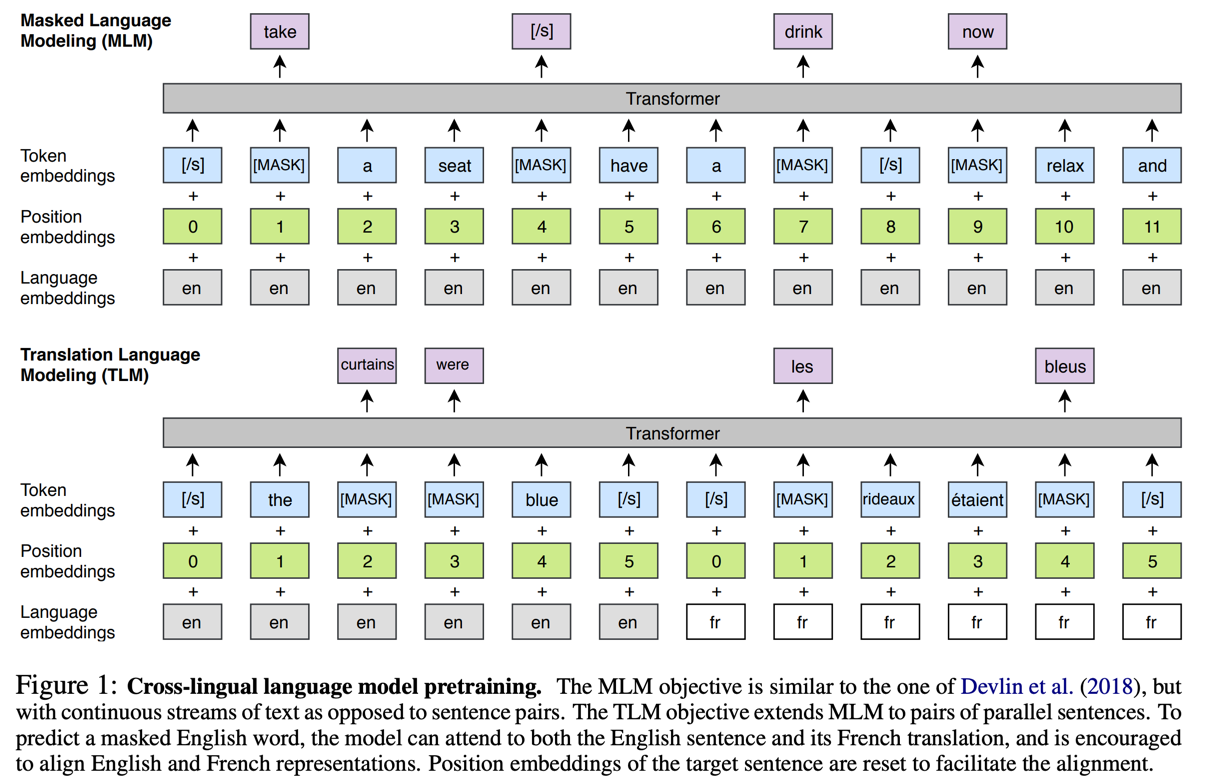

In [ ]:
xlmr = XLMRModel.from_pretrained('./model-bin/language_model/xlmr.base', checkpoint_file='model.pt')
xlmr.eval()  # disable dropout (or leave in train mode to finetune)

loading archive file ./model-bin/language_model/xlmr.base
| dictionary: 250001 types


RobertaHubInterface(
  (model): RobertaModel(
    (decoder): RobertaEncoder(
      (sentence_encoder): TransformerSentenceEncoder(
        (embed_tokens): Embedding(250002, 768, padding_idx=1)
        (embed_positions): LearnedPositionalEmbedding(514, 768, padding_idx=1)
        (layers): ModuleList(
          (0): TransformerSentenceEncoderLayer(
            (self_attn): MultiheadAttention(
              (k_proj): Linear(in_features=768, out_features=768, bias=True)
              (v_proj): Linear(in_features=768, out_features=768, bias=True)
              (q_proj): Linear(in_features=768, out_features=768, bias=True)
              (out_proj): Linear(in_features=768, out_features=768, bias=True)
            )
            (self_attn_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            (fc1): Linear(in_features=768, out_features=3072, bias=True)
            (fc2): Linear(in_features=3072, out_features=768, bias=True)
            (final_layer_norm): LayerNorm((76

In [ ]:
en_tokens = xlmr.encode('Hello world!')
assert en_tokens.tolist() == [0, 35378,  8999, 38, 2]
xlmr.decode(en_tokens)  # 'Hello world!'

'Hello world!'

In [ ]:
xlmr.encode('world!')

tensor([   0, 8999,   38,    2])

In [ ]:
vi_tokens = xlmr.encode('Đây là một mô hình ngôn ngữ')
assert vi_tokens.tolist() == [0, 37540, 580, 889, 23110, 4609, 88459, 52116, 2]
xlmr.decode(vi_tokens)  # 'Đây là một mô hình ngôn ngữ'

'Đây là một mô hình ngôn ngữ'

In [ ]:
xlmr.encode('ngữ')

tensor([    0, 52116,     2])

In [ ]:
xlmr.fill_mask('hanoi university of <mask> and technology', topk=3)

/usr/local/lib/python3.7/dist-packages/fairseq/models/roberta/hub_interface.py:154: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  masked_index = (tokens == self.task.mask_idx).nonzero()


[('hanoi university of science and technology',
  0.8753652572631836,
  ' science'),
 ('hanoi university of design and technology',
  0.034463342279195786,
  ' design'),
 ('hanoi university of business and technology',
  0.02631702832877636,
  ' business')]

In [ ]:
xlmr.fill_mask('Đại học Bách <mask> Hà Nội', topk=7)

[('Đại học Bách khoa Hà Nội', 0.5571130514144897, ' khoa'),
 ('Đại học Bách Khoa Hà Nội', 0.4423059821128845, ' Khoa'),
 ('Đại học Bách Việt Hà Nội', 0.00010002350609283894, ' Việt'),
 ('Đại học Bách sư Hà Nội', 3.5469649446895346e-05, ' sư'),
 ('Đại học Bách văn Hà Nội', 3.450146323302761e-05, ' văn'),
 ('Đại học Bách phạm Hà Nội', 2.7331660021445714e-05, ' phạm'),
 ('Đại học Bách hiệu Hà Nội', 2.3818191039026715e-05, ' hiệu')]

# Project structure
```
|
|---- data-bin # Chứa dữ liệu raw và dữ liệu đã xử lý để đưa vào huấn luyện mô hình
|---- model-bin # Chứa mô hình pre-trained và mô hình MRC sau khi huấn luyện
|---- plugin # Code mô hình
|       |---- criterions # Chứa code tính hàm mất mát
|       |---- models # Chứa code model MRC
|       |---- tasks # Object chứa các thành phần để huấn luyện mô hình (dataset, model, config,...)
|       |---- data # Các hàm tiện ích để xử lý dữ liệu 
|---- unify_data.py # Chuẩn hoá dữ liệu json sang dạng dữ liệu MRC.
|---- prepare_mrc_data.py # Code chuẩn bị dữ liệu dạng text sang dạng tensor để đưa vào mô hình
|---- train_mrc_model.py # Chứa code huấn luyện mô hình MRC
|---- infer_mrc_model.py # Chứa code infer model MRC sau khi huấn luyện xong
|---- requirements.txt # Chứa các dependency sử dụng trong project



## Xử lý dữ liệu

### Chuẩn hoá data json thành dạng src và tgt
- src: dạng subwords sequence, kết hợp cả câu hỏi và câu trả lời
- tgt: vị trí bắt đầu và vị trí kết thúc của câu trả lời 

In [ ]:
list_train_files = ['./data-bin/raw/train-v2.0.json']
list_valid_files = ['./data-bin/raw/dev-v2.0.json']

write_fairseq_dataset(list_train_files, 'train')
write_fairseq_dataset(list_valid_files, 'valid')

Chunk ./data-bin/raw/train-v2.0.json:  11%|█         | 48/442 [00:16<01:47,  3.67it/s]

⟨hp⟩ --- ⟨ʰp⟩
p ph b --- p pʰ b
ph th kh --- pʰ tʰ kʰ


Chunk ./data-bin/raw/train-v2.0.json:  21%|██▏       | 94/442 [00:28<01:58,  2.94it/s]

Arabic : عبد , ) ( meaning " slave " --- Arabic : عبد‎ , ) ( meaning " slave "


Chunk ./data-bin/raw/train-v2.0.json:  40%|████      | 177/442 [00:53<01:56,  2.28it/s]

St.Catherine ́s --- St.Catherine´s
St.Brendan ́s school --- St.Brendan´s school


Chunk ./data-bin/raw/train-v2.0.json:  51%|█████     | 225/442 [01:09<00:52,  4.15it/s]

29°02′S 167°57′E / 29.033°S 167.950°E / -29.033 ; 167.950 --- 29°02′S 167°57′E﻿ / ﻿29.033°S 167.950°E﻿ / -29.033 ; 167.950


Chunk ./data-bin/raw/train-v2.0.json:  52%|█████▏    | 229/442 [01:10<01:08,  3.12it/s]

27 /km2 ( 70 /sq mi ) --- 27 /km² ( 70 /sq mi )


Chunk ./data-bin/raw/train-v2.0.json:  55%|█████▍    | 241/442 [01:14<00:58,  3.43it/s]

harsh and life‐threatening --- harsh and life‑threatening


Chunk ./data-bin/raw/train-v2.0.json:  56%|█████▌    | 246/442 [01:16<00:54,  3.57it/s]

19 ̊N and 19 ̊S --- 19˚N and 19˚S


Chunk ./data-bin/raw/train-v2.0.json:  57%|█████▋    | 250/442 [01:17<01:00,  3.18it/s]

2,648.6/km2 --- 2,648.6/km²


Chunk ./data-bin/raw/train-v2.0.json:  58%|█████▊    | 255/442 [01:19<01:03,  2.93it/s]

. The Atlantic Ocean has less influence on the climate of the Piedmont region, which has hotter summers and colder winters than in the coast. Daytime highs in the Piedmont often reach over 90 °F (32 °C) in the summer. While it is not common for the temperature to reach over 100 °F (38 °C) in the state, such temperatures, when they occur, typically are found only in the lower-elevation areas of the Piedmont and far-inland areas of the coastal plain. The weaker influence of the Atlantic Ocean also means that temperatures in the Piedmont often fluctuate more widely than in the coast. 584


Chunk ./data-bin/raw/train-v2.0.json:  70%|██████▉   | 309/442 [01:36<00:59,  2.22it/s]

12,012 km2 --- 12,012 km²


Chunk ./data-bin/raw/train-v2.0.json:  74%|███████▍  | 327/442 [01:40<00:21,  5.44it/s]

No2 --- №2


Chunk ./data-bin/raw/train-v2.0.json:  74%|███████▍  | 328/442 [01:40<00:22,  5.13it/s]

E = mc2 --- E = mc²


Chunk ./data-bin/raw/train-v2.0.json:  83%|████████▎ | 365/442 [01:52<00:19,  3.99it/s]

60 million transistors were built in 2002... for [ each ] man , woman , and child --- 60 million transistors were built in 2002… for [ each ] man , woman , and child


Chunk ./data-bin/raw/dev-v2.0.json:  80%|████████  | 28/35 [00:08<00:02,  3.33it/s]

47°39′N 9°19′E / 47.650°N 9.317°E / 47.650 ; 9.317 --- 47°39′N 9°19′E﻿ / ﻿47.650°N 9.317°E﻿ / 47.650 ; 9.317


Write valid....: 100%|██████████| 11873/11873 [00:00<00:00, 191081.06it/s]


In [ ]:
!head ./data-bin/raw/train.src
!head ./data-bin/raw/train.tgt

<s> ▁When ▁did ▁Beyonce ▁start ▁becoming ▁popular ? </s> ▁Bey on cé ▁G iselle ▁Know les - Car ter ▁( ▁/ bi ː ˈ j ɒ nse ɪ / ▁be e - YON - say ▁) ▁( ▁born ▁September ▁4 ▁ , ▁1981 ▁) ▁is ▁an ▁American ▁sing er ▁ , ▁song writer ▁ , ▁record ▁producer ▁and ▁actress ▁ . ▁Bor n ▁and ▁raised ▁in ▁Houston ▁ , ▁Texas ▁ , ▁she ▁perform ed ▁in ▁various ▁sing ing ▁and ▁dan cing ▁competition s ▁as ▁a ▁child ▁ , ▁and ▁rose ▁to ▁fame ▁in ▁the ▁late ▁1990 s ▁as ▁lead ▁sing er ▁of ▁R ▁& ▁B ▁girl - group ▁Des tiny ▁' s ▁Child ▁ . ▁Mana ged ▁by ▁her ▁father ▁ , ▁Mathe w ▁Know les ▁ , ▁the ▁group ▁became ▁one ▁of ▁the ▁world ▁' s ▁best - sel ling ▁girl ▁groups ▁of ▁all ▁time ▁ . ▁The ir ▁hi atus ▁saw ▁the ▁release ▁of ▁Bey on cé ▁' s ▁debut ▁album ▁ , ▁Dan ger ously ▁in ▁Love ▁( ▁2003 ▁) ▁ , ▁which ▁established ▁her ▁as ▁a ▁solo ▁artist ▁worldwide ▁ , ▁earn ed ▁five ▁Grammy ▁Awards ▁and ▁feature d ▁the ▁Billboard ▁Hot ▁100 ▁number - one ▁single s ▁" ▁Crazy ▁in ▁Love ▁" ▁and ▁" ▁Baby ▁Boy ▁" ▁ . </s>
<s> ▁Wh

In [ ]:
!head ./data-bin/raw/valid.src
!head ./data-bin/raw/valid.tgt

<s> ▁In ▁what ▁country ▁is ▁Norman dy ▁located ? </s> ▁The ▁Norman s ▁( ▁Norman ▁: ▁No ur mand s ▁; ▁French ▁: ▁Norman ds ▁; ▁Latin ▁: ▁Norman ni ▁) ▁were ▁the ▁people ▁who ▁in ▁the ▁10 th ▁and ▁11 th ▁centuri es ▁gave ▁their ▁name ▁to ▁Norman dy ▁ , ▁a ▁region ▁in ▁France ▁ . ▁They ▁were ▁descend ed ▁from ▁Nors e ▁( ▁" ▁Norman ▁" ▁comes ▁from ▁" ▁Nors eman ▁" ▁) ▁raid ers ▁and ▁pirat es ▁from ▁Denmark ▁ , ▁Iceland ▁and ▁Norway ▁who ▁ , ▁under ▁their ▁leader ▁Roll o ▁ , ▁agreed ▁to ▁swe ar ▁fe al ty ▁to ▁King ▁Charles ▁III ▁of ▁West ▁Francia ▁ . ▁Through ▁generation s ▁of ▁assim i lation ▁and ▁mix ing ▁with ▁the ▁na tive ▁Frank ish ▁and ▁Roman - Ga u lish ▁population s ▁ , ▁their ▁descend ants ▁would ▁gradual ly ▁merge ▁with ▁the ▁Carol ing ian - based ▁culture s ▁of ▁West ▁Francia ▁ . ▁The ▁distinct ▁cultural ▁and ▁et h nic ▁identity ▁of ▁the ▁Norman s ▁emerge d ▁initial ly ▁in ▁the ▁first ▁half ▁of ▁the ▁10 th ▁century ▁ , ▁and ▁it ▁continued ▁to ▁evolve ▁over ▁the ▁succeed ing ▁cent

### Chuyển dữ liệu về dạng tensor để input vào trong model. Dữ liệu sau đó sẽ được lưu ở dạng binary

In [ ]:
# !rm -rf ./data-bin/preprocessed

In [ ]:
sys.argv = sys.argv[:1] + [
        '--source-lang', 'src',
        '--target-lang', 'tgt',
        '--user-dir', './plugin',
        '--task', 'qa_mrc',
        '--pre-trained-lm', './model-bin/language_model/xlmr.base',
        '--trainpref', 'data-bin/raw/train',
        '--validpref', 'data-bin/raw/valid',
        '--destdir', 'data-bin/preprocessed',
        '--workers', '10'
    ]

prepare_mrc_data.cli_main()

Namespace(align_suffix=None, alignfile=None, bpe=None, cpu=False, criterion='cross_entropy', dataset_impl='mmap', destdir='data-bin/preprocessed', empty_cache_freq=0, fp16=False, fp16_init_scale=128, fp16_scale_tolerance=0.0, fp16_scale_window=None, joined_dictionary=False, log_format=None, log_interval=1000, lr_scheduler='fixed', memory_efficient_fp16=False, min_loss_scale=0.0001, no_progress_bar=False, nwordssrc=-1, nwordstgt=-1, only_source=False, optimizer='nag', padding_factor=8, pre_trained_lm='./model-bin/language_model/xlmr.base', seed=1, source_lang='src', srcdict=None, target_lang='tgt', task='qa_mrc', tensorboard_logdir='', testpref=None, tgtdict=None, threshold_loss_scale=None, thresholdsrc=0, thresholdtgt=0, tokenizer=None, trainpref='data-bin/raw/train', user_dir='./plugin', validpref='data-bin/raw/valid', workers=10)
loading archive file ./model-bin/language_model/xlmr.base
| dictionary: 250001 types
| [src] Dictionary: 250001 types
| [src] data-bin/raw/train.src: 130318

## Xây dựng mô hình


```
RobertaMRCSpan(
  (context_encoder): ContextEncoder(
    (bert_encoder): RobertaModel(
      (decoder): RobertaEncoder(
        (sentence_encoder): TransformerSentenceEncoder(
          (embed_tokens): Embedding(250002, 768, padding_idx=1)
          (embed_positions): LearnedPositionalEmbedding(514, 768, padding_idx=1)
          (layers): ModuleList(
            (0): TransformerSentenceEncoderLayer(
              (self_attn): MultiheadAttention(
                (k_proj): Linear(in_features=768, out_features=768, bias=True)
                (v_proj): Linear(in_features=768, out_features=768, bias=True)
                (q_proj): Linear(in_features=768, out_features=768, bias=True)
                (out_proj): Linear(in_features=768, out_features=768, bias=True)
              )
              (self_attn_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
              (fc1): Linear(in_features=768, out_features=3072, bias=True)
              (fc2): Linear(in_features=3072, out_features=768, bias=True)
              (final_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            )
            (1): TransformerSentenceEncoderLayer(
              (self_attn): MultiheadAttention(
                (k_proj): Linear(in_features=768, out_features=768, bias=True)
                (v_proj): Linear(in_features=768, out_features=768, bias=True)
                (q_proj): Linear(in_features=768, out_features=768, bias=True)
                (out_proj): Linear(in_features=768, out_features=768, bias=True)
              )
              (self_attn_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
              (fc1): Linear(in_features=768, out_features=3072, bias=True)
              (fc2): Linear(in_features=3072, out_features=768, bias=True)
              (final_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            )
            (2): TransformerSentenceEncoderLayer(
              (self_attn): MultiheadAttention(
                (k_proj): Linear(in_features=768, out_features=768, bias=True)
                (v_proj): Linear(in_features=768, out_features=768, bias=True)
                (q_proj): Linear(in_features=768, out_features=768, bias=True)
                (out_proj): Linear(in_features=768, out_features=768, bias=True)
              )
              (self_attn_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
              (fc1): Linear(in_features=768, out_features=3072, bias=True)
              (fc2): Linear(in_features=3072, out_features=768, bias=True)
              (final_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            )
            (3): TransformerSentenceEncoderLayer(
              (self_attn): MultiheadAttention(
                (k_proj): Linear(in_features=768, out_features=768, bias=True)
                (v_proj): Linear(in_features=768, out_features=768, bias=True)
                (q_proj): Linear(in_features=768, out_features=768, bias=True)
                (out_proj): Linear(in_features=768, out_features=768, bias=True)
              )
              (self_attn_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
              (fc1): Linear(in_features=768, out_features=3072, bias=True)
              (fc2): Linear(in_features=3072, out_features=768, bias=True)
              (final_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            )
            (4): TransformerSentenceEncoderLayer(
              (self_attn): MultiheadAttention(
                (k_proj): Linear(in_features=768, out_features=768, bias=True)
                (v_proj): Linear(in_features=768, out_features=768, bias=True)
                (q_proj): Linear(in_features=768, out_features=768, bias=True)
                (out_proj): Linear(in_features=768, out_features=768, bias=True)
              )
              (self_attn_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
              (fc1): Linear(in_features=768, out_features=3072, bias=True)
              (fc2): Linear(in_features=3072, out_features=768, bias=True)
              (final_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            )
            (5): TransformerSentenceEncoderLayer(
              (self_attn): MultiheadAttention(
                (k_proj): Linear(in_features=768, out_features=768, bias=True)
                (v_proj): Linear(in_features=768, out_features=768, bias=True)
                (q_proj): Linear(in_features=768, out_features=768, bias=True)
                (out_proj): Linear(in_features=768, out_features=768, bias=True)
              )
              (self_attn_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
              (fc1): Linear(in_features=768, out_features=3072, bias=True)
              (fc2): Linear(in_features=3072, out_features=768, bias=True)
              (final_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            )
            (6): TransformerSentenceEncoderLayer(
              (self_attn): MultiheadAttention(
                (k_proj): Linear(in_features=768, out_features=768, bias=True)
                (v_proj): Linear(in_features=768, out_features=768, bias=True)
                (q_proj): Linear(in_features=768, out_features=768, bias=True)
                (out_proj): Linear(in_features=768, out_features=768, bias=True)
              )
              (self_attn_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
              (fc1): Linear(in_features=768, out_features=3072, bias=True)
              (fc2): Linear(in_features=3072, out_features=768, bias=True)
              (final_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            )
            (7): TransformerSentenceEncoderLayer(
              (self_attn): MultiheadAttention(
                (k_proj): Linear(in_features=768, out_features=768, bias=True)
                (v_proj): Linear(in_features=768, out_features=768, bias=True)
                (q_proj): Linear(in_features=768, out_features=768, bias=True)
                (out_proj): Linear(in_features=768, out_features=768, bias=True)
              )
              (self_attn_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
              (fc1): Linear(in_features=768, out_features=3072, bias=True)
              (fc2): Linear(in_features=3072, out_features=768, bias=True)
              (final_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            )
            (8): TransformerSentenceEncoderLayer(
              (self_attn): MultiheadAttention(
                (k_proj): Linear(in_features=768, out_features=768, bias=True)
                (v_proj): Linear(in_features=768, out_features=768, bias=True)
                (q_proj): Linear(in_features=768, out_features=768, bias=True)
                (out_proj): Linear(in_features=768, out_features=768, bias=True)
              )
              (self_attn_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
              (fc1): Linear(in_features=768, out_features=3072, bias=True)
              (fc2): Linear(in_features=3072, out_features=768, bias=True)
              (final_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            )
            (9): TransformerSentenceEncoderLayer(
              (self_attn): MultiheadAttention(
                (k_proj): Linear(in_features=768, out_features=768, bias=True)
                (v_proj): Linear(in_features=768, out_features=768, bias=True)
                (q_proj): Linear(in_features=768, out_features=768, bias=True)
                (out_proj): Linear(in_features=768, out_features=768, bias=True)
              )
              (self_attn_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
              (fc1): Linear(in_features=768, out_features=3072, bias=True)
              (fc2): Linear(in_features=3072, out_features=768, bias=True)
              (final_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            )
            (10): TransformerSentenceEncoderLayer(
              (self_attn): MultiheadAttention(
                (k_proj): Linear(in_features=768, out_features=768, bias=True)
                (v_proj): Linear(in_features=768, out_features=768, bias=True)
                (q_proj): Linear(in_features=768, out_features=768, bias=True)
                (out_proj): Linear(in_features=768, out_features=768, bias=True)
              )
              (self_attn_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
              (fc1): Linear(in_features=768, out_features=3072, bias=True)
              (fc2): Linear(in_features=3072, out_features=768, bias=True)
              (final_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            )
            (11): TransformerSentenceEncoderLayer(
              (self_attn): MultiheadAttention(
                (k_proj): Linear(in_features=768, out_features=768, bias=True)
                (v_proj): Linear(in_features=768, out_features=768, bias=True)
                (q_proj): Linear(in_features=768, out_features=768, bias=True)
                (out_proj): Linear(in_features=768, out_features=768, bias=True)
              )
              (self_attn_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
              (fc1): Linear(in_features=768, out_features=3072, bias=True)
              (fc2): Linear(in_features=3072, out_features=768, bias=True)
              (final_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            )
          )
          (emb_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        )
        (lm_head): RobertaLMHead(
          (dense): Linear(in_features=768, out_features=768, bias=True)
          (layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        )
      )
      (classification_heads): ModuleDict()
    )
    (dropout): Dropout(p=0.3, inplace=False)
    (context_transform): Linear(in_features=2304, out_features=768, bias=True)
  )
  (starts_ends_transform): Linear(in_features=768, out_features=2, bias=True)
)
```



In [ ]:
sys.argv = sys.argv[:1] + [
        './data-bin/preprocessed/',
        '--arch', 'mrc_span_roberta',
        '--user-dir', './plugin',
        '--optimizer', 'adam',
        '--adam-betas', '(0.9,0.98)',
        '--lr', '0.0002',
        '--lr-scheduler', 'inverse_sqrt',
        '--warmup-updates', '1000',
        '--task', 'qa_mrc',
        '--source-lang', 'src',
        '--target-lang', 'tgt',
        '--dropout', '0.3',
        '--weight-decay', '0.0001',
        '--max-tokens', '1200',
        '--min-lr', '1e-09',
        '--criterion', 'mrc_span_criterion',
        '--max-epoch', '5',
        '--warmup-init-lr', '1e-07',
        '--save-dir', './model-bin/mrc_span',
        '--keep-interval-updates', '5',
        '--keep-last-epochs', '1',
        '--dataset-impl', 'mmap',
        '--num-workers', '0',
        '--log-interval', '10',
        '--pre-trained-lm', './model-bin/language_model/xlmr.base',
        '--skip-invalid-size-inputs-valid-test',
        '--update-freq', '10',
    ]

In [ ]:
train_mrc_model.cli_main()

Namespace(adam_betas='(0.9,0.98)', adam_eps=1e-08, arch='mrc_span_roberta', best_checkpoint_metric='loss', bpe=None, bucket_cap_mb=25, clip_norm=25, cpu=False, criterion='mrc_span_criterion', curriculum=0, data='./data-bin/preprocessed/', dataset_impl='mmap', ddp_backend='c10d', device_id=0, disable_validation=False, distributed_backend='nccl', distributed_init_method=None, distributed_no_spawn=False, distributed_port=-1, distributed_rank=0, distributed_world_size=1, dropout=0.3, empty_cache_freq=0, fast_stat_sync=False, find_unused_parameters=False, fix_batches_to_gpus=False, fixed_validation_seed=None, fp16=False, fp16_init_scale=128, fp16_scale_tolerance=0.0, fp16_scale_window=None, keep_interval_updates=5, keep_last_epochs=1, label_smoothing=0.0, lazy_load=False, left_pad_source='True', left_pad_target='False', load_alignments=False, log_format=None, log_interval=10, lr=[0.0002], lr_scheduler='inverse_sqrt', max_answer_length=30, max_epoch=5, max_sentences=None, max_sentences_valid